In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Universities.csv to Universities.csv


In [4]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
# Similar to the sklearn.preprocessing, MinMaxScaler function
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Similar to the sklearn.preprocessing, StandardScaler function
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [6]:
x=norm_func(Univ.iloc[:,1:])
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.401994,0.644235,-0.871888,0.068841,-0.324717,0.803729
1,1.370988,1.210256,-0.719814,-1.652182,2.508651,-0.631501
2,-0.059432,-0.745090,1.003685,-0.914600,-0.163745,-1.625123
3,0.401994,-0.024699,-0.770506,-0.177019,0.285756,0.141315
4,0.125139,0.335496,-0.314285,0.068841,-0.382949,0.362120
5,0.678850,0.644235,-0.821197,-0.668740,0.330956,0.914132
6,0.448137,0.695691,-0.466359,-0.177019,0.290956,0.914132
7,-0.105574,-0.127612,-0.770506,-0.177019,-0.503436,0.582924
8,1.232561,0.747148,-1.277417,-0.422880,0.841393,1.134936
9,0.355852,-0.076156,0.243318,-1.406321,2.170070,0.030913


In [ ]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [ ]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

# Elbow Chart

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[143.99999999999994, 61.57947259209858, 42.75049126219292, 32.308168134251744, 25.87553436276778, 22.10707111519673, 17.826160349625475, 15.64959805533557, 12.93965221417038, 10.214923629637575]


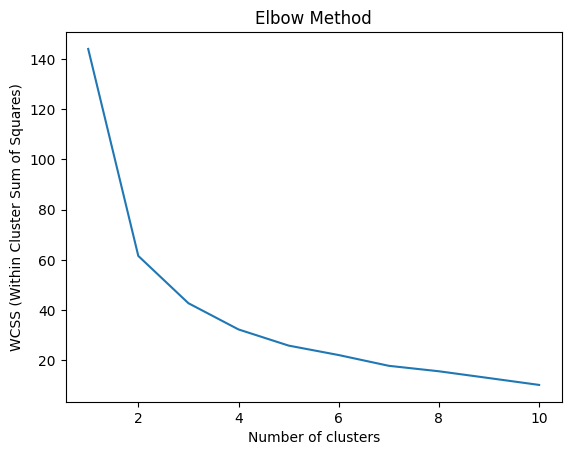

In [7]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [8]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [9]:
clusters_new.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [10]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [ ]:
#These are standardized values.
clusters_new.cluster_centers_

array([[-0.12403127,  0.06277688,  0.21797196,  0.04425486, -0.37295276,
         0.01987242],
       [-1.89129229, -1.94145231,  1.56128756,  1.60546806, -1.2086753 ,
        -1.65272331],
       [ 0.78651575,  0.66710444, -0.88315256, -0.4228798 ,  0.43172312,
         0.77919531],
       [ 0.86342006,  0.56705021, -0.23824843, -1.52925136,  2.33936037,
        -0.30029442]])

In [11]:
#Univ.groupby('clusterid_new').agg(['mean']).reset_index()
Univ.iloc[:,1:].groupby('clusterid_new').agg(['mean'])
#Univ.groupby('clusterid_new').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,
0,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [ ]:
Univ['clusterid_new']=Univ['clusterid_new'].replace(0, 'Cluster 1')
Univ['clusterid_new']=Univ['clusterid_new'].replace(1, 'Cluster 2')
Univ['clusterid_new']=Univ['clusterid_new'].replace(2, 'Cluster 3')
Univ['clusterid_new']=Univ['clusterid_new'].replace(3, 'Cluster 4')
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,Cluster 3
1,CalTech,1415,100,25,6,63575,81,Cluster 4
2,CMU,1260,62,59,9,25026,72,Cluster 1
3,Columbia,1310,76,24,12,31510,88,Cluster 3
4,Cornell,1280,83,33,13,21864,90,Cluster 1
5,Dartmouth,1340,89,23,10,32162,95,Cluster 3
6,Duke,1315,90,30,12,31585,95,Cluster 3
7,Georgetown,1255,74,24,12,20126,92,Cluster 1
8,Harvard,1400,91,14,11,39525,97,Cluster 3
9,JohnsHopkins,1305,75,44,7,58691,87,Cluster 4


In [ ]:
Univ.groupby('clusterid_new').agg(['mean'])

TypeError: Could not convert CMUCornellGeorgetownNorthwesternNotreDameUCBerkeleyUChicagoUMichiganUPennUVA to numeric

In [ ]:
Univ.columns

In [ ]:
Univ['clusterid_new'].value_counts()